<a href="https://colab.research.google.com/github/ad045/ML_playground/blob/master/Assignment_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment B Week 1

## Linear-Nonlinear-Poisson (LNP) Model

This is the assignment B for Week 1. Below, you find two exercises. Try to finish them, commit your submission notebook, and check out the test result!

**Note**: Once you code the two function `estimate_nl` and `estimate_rf` in this notebook, you need to add them to the submission.ipynb file.

To check out instructions on how to complete your assignment, you can check out info repo:
https://github.com/MScNE-LSMLSDA/course-info


## Exercise 0

For the first Exercise, we will use spike triggered average (STA) to compute the optima receptive field (RF) to a neuron, based on its responses on random noise. Then, we will use this estimated linear filter and the actual stimulus You can read about RF estimation on the material in the Moodle.

You will be given as source data:
  1. A spike train recorded from the neuron
  2. The movie of white noise that was displayed to the neuron consisting of 200,000 frames, each one 20 pixels by 20 pixels.

All data have a sampling rate of 1KHz (1 bin = 1ms)

The source data downloads automatically in the first cell. If you are working on your computer, data will be placed in your working directory. Data is in [www.portugueslab.com/courses/LSMDA2024/stimulus.npy](https://www.portugueslab.com/courses/LSMDA2024/stimulus.npy) and [www.portugueslab.com/courses/LSMDA2024/spikes.npy](https://www.portugueslab.com/courses/LSMDA2024/spikes.npy).


 1) Write a function `estimate_rf(st, sp, num_window)` that takes three inputs, the stimulus-train, the spike-train and a temporal window, and returns the receptive field **rf** of the neuron in question  estimated by spike triggered average within the given window.

 Inputs:
 - **st**: 3D np.array, (nb_pixels_w x nb_pixels_h x nb_timepoints )
 - **sp**: 1D np.array, nb_timepoints
 - **num_window**: int, length of the window
 Output:
 - **rf** receptive field, 2D np.array (nb_pixels_w x nb_pixels_h)

In [5]:
# Here, we download the data:
import urllib.request
import numpy as np
import os
import matplotlib.pyplot as plt

def fetch_data():
  files = ["stimulus.npy", "spikes.npy"]
  try:
    return [np.load(f) for f in files]
  except FileNotFoundError:

    for f in files:
      urllib.request.urlretrieve(f'http://www.portugueslab.com/courses/LSMDA2024/{f}', f)
  return [np.load(f) for f in files]

stim, spikes = fetch_data()



In [16]:
def estimate_rf(st, sp, num_window):
    num_pixels_w, num_pixels_h, num_timepoints = st.shape # nb_pixels_w x nb_pixels_h x nb_timepoints
    rf = np.zeros((num_pixels_w, num_pixels_h)) # nb_pixels_w x nb_pixels_h
    count = 0

    # Loop through each timepoint in the spike train
    for t in range(num_window, num_timepoints):
        if sp[t] > 0:  # check if a spike occurred
            rf += np.sum(st[:, :, t-num_window : t], axis=2)
            count += 1

    if count > 0:
        rf /= count  # normalize by the number of spikes
    return rf

In [3]:
# Showing prototyping approach:

#  def estimate_rf(st, sp, num_window):
#     # stimulus train, spike train, temporal window >> receptive field rf (spike triggered average withhin given window)
#     print(st.shape) # (20,20,200000)
#     print(sp.shape) # (200000,)
#     num_pixels_w, num_pixels_h, num_timepoints = st.shape # nb_pixels_w x nb_pixels_h x nb_timepoints
#     rf = np.zeros((num_pixels_w, num_pixels_h)) # nb_pixels_w x nb_pixels_h
#     count = 0

#     # Loop through each timepoint in the spike train
#     for t in range(num_window, num_timepoints): # 0, num_timepoints-num_window):
#         if sp[t] > 0:  # check if a spike occurred
#             rf += np.sum(st[:, :, t-num_window : t], axis=2)
#             count += 1

#     if count > 0:
#         rf /= count  # normalize by the number of spikes
#     print(count)
#     print(rf.shape)
#     return rf

(20, 20, 200000)
(200000,)
39171
(20, 20)


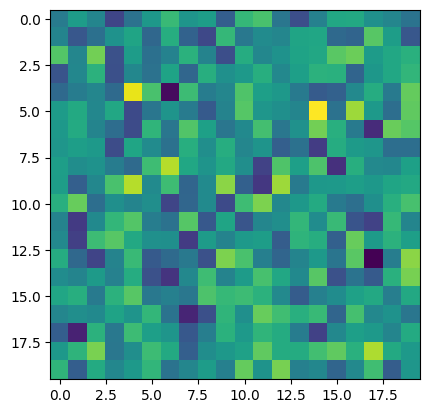

In [8]:
rf = estimate_rf(stim, spikes, 10)
plt.imshow([[rf[(n, d)] for d in range(20)] for n in range(20)])


### Attempting different window sizes





Shorter window
(20, 20, 200000)
(200000,)
39172
(20, 20)


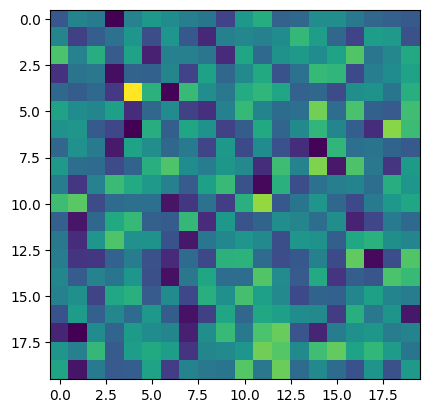

In [13]:
print("Shorter window")
rf = estimate_rf(stim, spikes, 5)
plt.imshow([[rf[(n, d)] for d in range(20)] for n in range(20)])


Longer window
(20, 20, 200000)
(200000,)
39168
(20, 20)


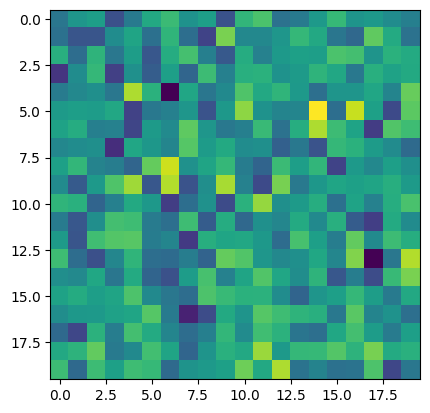

In [14]:
print("Longer window")
rf = estimate_rf(stim, spikes, 20)
plt.imshow([[rf[(n, d)] for d in range(20)] for n in range(20)])


## Exercise 1 [optional]

As you have read in the course material for the assignment, LNP models of neurons consist of three parts:
 1. a linear filter that compute the firing rate as linear term,
 2. a nonlinear term that takes as input the result of the linear filter and applies a nonlinear function to it (the easiest can be a rectified linear function, or a saturating sigmoid) to produce the expected firing rate. This is reasonable to expect as neurons have a threshold to fire!
 3. a poisson process that generate spikes from the expected firing rate computed in the nonlinear function.

In Exercise 0, we calculated the RF for the neuron (which under some assumptions can be done even not considering the nonlinearity). Now, we need to see if we can reconstruct the nonlinearity considering what our linear RF predicts as the neuron activity, and the neuron actual firing.

Your task is to try to estimate the nonlinearity function of the neuron. The nonlinearity will be a function taking as input activations computed using the RF and the stimulus and will produce final firing rate in Hz.

There can be several ways of doing this, In general, you will need to proceed in this way:
1. Calculate linear activation of the neuron from the stimulus and the receptive field.
2. Understand how this expected linear activation of the neuron relate with the actual firing rate of the neuron. (One way can be to can use percentiles -or some other binning- to "chunk" the linear activation, and count the fraction of spikes that were produced when the linear activation was lower that some given value). Make a plot of this curve.
3. [If you are really motivated] fit a function to the relationship you find.

There will be no tests for this final assignment, but plenty of bonus points if you can get to having a figure showing the nonlinearity curve of the neuron!


In [37]:
# 1) Linear activation
linear_activation = np.dot(rf, stim) # (20, 20, 200000)
summed_linear_activation = np.sum(np.sum(linear_activation, axis=0), axis=0) # (200000,)

# And: spikes.shape # (200000,)

In [74]:
# 2) Convolution as preprocessing to binning

from scipy.ndimage import uniform_filter1d

def apply_uniform_filter(data, size=10):
    filtered_data = uniform_filter1d(data, size=size)
    return filtered_data

smoothed_spikes = apply_uniform_filter(spikes, size=10)
smoothed_lin_activ = apply_uniform_filter(summed_linear_activation, size=10)

# plt.scatter(smoothed_spikes, smoothed_lin_activ, alpha=0.005)


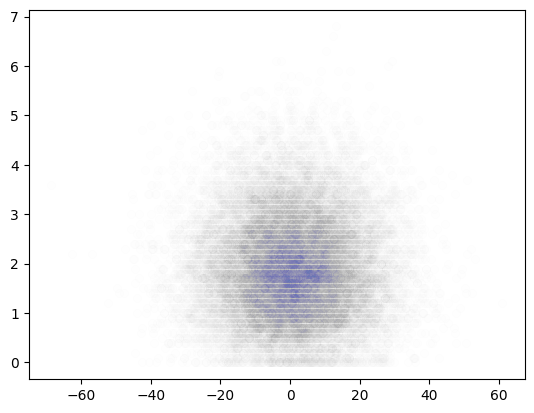

In [75]:
# 2) Binning
bin_size = 10
binned_linear_activations = np.sum(smoothed_lin_activ.reshape(-1, 10), axis=1)
binned_spikes = np.sum(smoothed_spikes.reshape(-1, 10), axis=1)
plt.scatter(binned_linear_activations, binned_spikes, alpha=0.005)


In [73]:
def rectified_linear(x):
    return np.maximum(0, x)

def sigmoid(x, a, b):
    return 1 / (1 + np.exp(-a * (x - b)))

In [ ]:
# 3) Now with non-lin
# ...
